<a href="https://colab.research.google.com/github/akankshaUniyal20/Mircrobes_Identification/blob/main/MicrobesIdentification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os,glob
import pandas as pd
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report

In [ ]:
file_path = "/content/drive/My Drive/MicrobesIdentification/Dataset"

In [ ]:
name_class = os.listdir(file_path)

In [ ]:
name_class

['Rod_bacteria',
 'Amoeba',
 'Paramecium',
 'Euglena',
 'Yeast',
 'Hydra',
 'Spiral_bacteria',
 'Spherical_bacteria']

In [ ]:
filePath = list(glob.glob(file_path+'/**/*.*'))

In [ ]:
filePath

['/content/drive/My Drive/MicrobesIdentification/Dataset/Rod_bacteria/Image_1.jpg',
 '/content/drive/My Drive/MicrobesIdentification/Dataset/Rod_bacteria/Image_10.jpg',
 '/content/drive/My Drive/MicrobesIdentification/Dataset/Rod_bacteria/Image_100.jpg',
 '/content/drive/My Drive/MicrobesIdentification/Dataset/Rod_bacteria/Image_25.jpg',
 '/content/drive/My Drive/MicrobesIdentification/Dataset/Rod_bacteria/Image_104.jpg',
 '/content/drive/My Drive/MicrobesIdentification/Dataset/Rod_bacteria/Image_35.jpg',
 '/content/drive/My Drive/MicrobesIdentification/Dataset/Rod_bacteria/Image_42.jpg',
 '/content/drive/My Drive/MicrobesIdentification/Dataset/Rod_bacteria/Image_49.jpg',
 '/content/drive/My Drive/MicrobesIdentification/Dataset/Rod_bacteria/Image_33.jpg',
 '/content/drive/My Drive/MicrobesIdentification/Dataset/Rod_bacteria/Image_37.png',
 '/content/drive/My Drive/MicrobesIdentification/Dataset/Rod_bacteria/Image_14.jpg',
 '/content/drive/My Drive/MicrobesIdentification/Dataset/Rod_bac

In [ ]:
labels = list(map(lambda x : os.path.split(os.path.split(x)[0])[1],filePath))
labels

['Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria',
 'Rod_bacteria

In [ ]:
filePath = pd.Series(filePath,name = 'FilePath').astype(str)
labels = pd.Series(labels,name='Label')
data = pd.concat([filePath,labels],axis =1)
data = data.sample(frac=1).reset_index(drop= True)
data.head(5)

,FilePath,Label
0,/content/drive/My Drive/MicrobesIdentification...,Euglena
1,/content/drive/My Drive/MicrobesIdentification...,Hydra
2,/content/drive/My Drive/MicrobesIdentification...,Euglena
3,/content/drive/My Drive/MicrobesIdentification...,Yeast
4,/content/drive/My Drive/MicrobesIdentification...,Paramecium


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

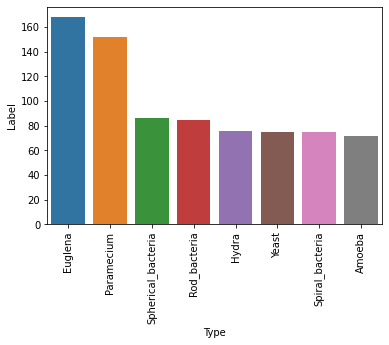

In [ ]:
#plotting bar graph of data to measure the count of images
counts = data.Label.value_counts()
sns.barplot(x=counts.index,y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90)


In [ ]:
train,test = train_test_split(data,test_size =0.25,random_state = 42 )

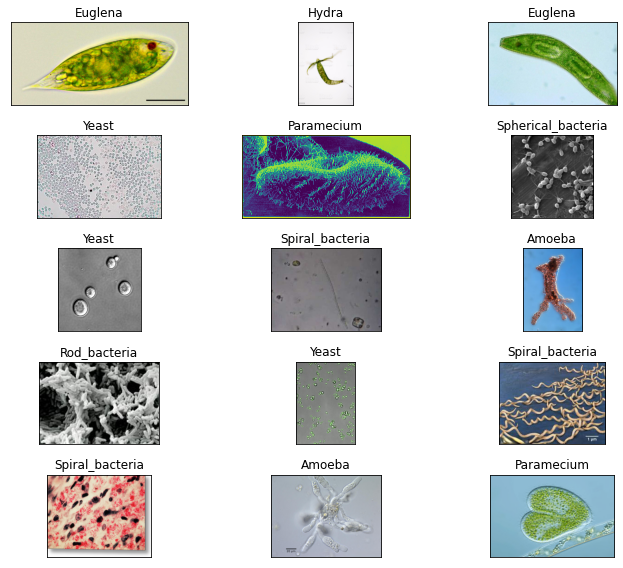

In [ ]:
fig,axes = plt.subplots(nrows=5,ncols=3,figsize=(10,8),subplot_kw={'xticks':[],'yticks':[]})
for i ,ax,in enumerate(axes.flat):
  ax.imshow(plt.imread(data.FilePath[i]))
  ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [ ]:
from sklearn import preprocessing
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_gen = train_datagen.flow_from_dataframe(dataframe = train,x_col = 'FilePath',y_col = 'Label',target_size=(100,100),class_mode ='categorical',batch_size =32,shuffle = True,seed =42)
valid_gen = train_datagen.flow_from_dataframe(dataframe = test,x_col = 'FilePath',y_col = 'Label',target_size=(100,100),class_mode ='categorical',batch_size =32,shuffle = False,seed =42)
test_gen =  train_datagen.flow_from_dataframe(dataframe = test,x_col = 'FilePath',y_col = 'Label',target_size=(100,100),class_mode ='categorical',batch_size =32,shuffle = False,seed =42)

Found 591 validated image filenames belonging to 8 classes.
Found 198 validated image filenames belonging to 8 classes.
Found 198 validated image filenames belonging to 8 classes.


In [ ]:
pretrained_model = ResNet50(input_shape=(100,100,3),include_top = False,weights = 'imagenet',pooling = 'avg')
pretrained_model.trainable = False

94765736/94765736 [==============================] - 0s 0us/step


In [ ]:
input = pretrained_model.input
x=Flatten()
x=Dense(32,activation='relu')(pretrained_model.output)
x=Dense(64,activation='relu')(x)
x=Dense(64,activation='relu')(x)
x=Dense(32,activation='relu')(x)

output = Dense(8,activation='softmax')(x)

model = Model(inputs=input,outputs=output)

In [ ]:
'''input = pretrained_model.input

x=Dense(128,activation='relu')(pretrained_model.output)
x=Dense(128,activation='relu')(x)

output = Dense(8,activation='softmax')(x)

model = Model(inputs=input,outputs=output)'''

"input = pretrained_model.input\n\nx=Dense(128,activation='relu')(pretrained_model.output)\nx=Dense(128,activation='relu')(x)\n\noutput = Dense(8,activation='softmax')(x)\n\nmodel = Model(inputs=input,outputs=output)"

In [ ]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
my_callbacks = [EarlyStopping(monitor = 'val_accuracy',min_delta=0,patience=2,mode='auto')]

In [ ]:
history = model.fit(train_gen,validation_data = valid_gen,epochs=100)

Epoch 1/100
19/19 [==============================] - 159s 8s/step - loss: 2.0347 - accuracy: 0.1827 - val_loss: 1.7914 - val_accuracy: 0.3737
Epoch 2/100
19/19 [==============================] - 40s 2s/step - loss: 1.6583 - accuracy: 0.3942 - val_loss: 1.5116 - val_accuracy: 0.4394
Epoch 3/100
19/19 [==============================] - 40s 2s/step - loss: 1.2914 - accuracy: 0.5431 - val_loss: 1.3092 - val_accuracy: 0.5354
Epoch 4/100
19/19 [==============================] - 40s 2s/step - loss: 1.0048 - accuracy: 0.6497 - val_loss: 1.3250 - val_accuracy: 0.5556
Epoch 5/100
19/19 [==============================] - 40s 2s/step - loss: 0.7405 - accuracy: 0.7648 - val_loss: 1.2643 - val_accuracy: 0.5960
Epoch 6/100
19/19 [==============================] - 40s 2s/step - loss: 0.5755 - accuracy: 0.8240 - val_loss: 1.3625 - val_accuracy: 0.5960
Epoch 7/100
19/19 [==============================] - 40s 2s/step - loss: 0.4219 - accuracy: 0.8646 - val_loss: 1.3517 - val_accuracy: 0.6162
Epoch 8/100


In [ ]:
model.save('microbiesIdentification_model.h5')

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
results = model.evaluate(test_gen,verbose=0)
print("Test Loss : {:0.5f}".format(results[0]))
print("Test Accuracy : {:0.2f}%".format(results[1]*100))

Test Loss : 2.19020
Test Accuracy : 65.66%


In [ ]:
#predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

#Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v, in labels.items())
pred = [labels[k]for k in pred]

7/7 [==============================] - 11s 1s/step


In [ ]:
#Accuracy with trainig data
model.evaluate(test_gen)

7/7 [==============================] - 10s 1s/step - loss: 2.1902 - accuracy: 0.6566


[2.1902036666870117, 0.6565656661987305]

In [ ]:
y_test = list(test.Label)
print(classification_report(y_test,pred))

                    precision    recall  f1-score   support

            Amoeba       0.50      0.23      0.32        13
           Euglena       0.75      0.87      0.80        47
             Hydra       0.75      0.75      0.75        16
        Paramecium       0.77      0.79      0.78        42
      Rod_bacteria       0.40      0.32      0.35        19
Spherical_bacteria       0.71      0.62      0.67        24
   Spiral_bacteria       0.45      0.60      0.51        15
             Yeast       0.50      0.50      0.50        22

          accuracy                           0.66       198
         macro avg       0.60      0.58      0.59       198
      weighted avg       0.65      0.66      0.65       198

